In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('shark_tank_companies.csv')
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [3]:
df.dtypes

deal                        bool
description               object
episode                    int64
category                  object
entrepreneurs             object
location                  object
website                   object
askedfor                   int64
exchangeforstake           int64
valuation                  int64
season                     int64
shark1                    object
shark2                    object
shark3                    object
shark4                    object
shark5                    object
title                     object
episode_season            object
multiple_entreprenuers      bool
dtype: object

<AxesSubplot:>

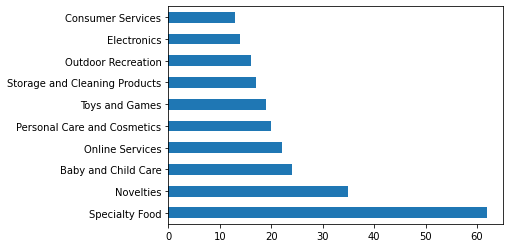

In [8]:
df['category'].value_counts()[:10].plot(kind ='barh')

Specialty Foods seem to be the most recurring product types to appear on Shark Tank. If you are a regulat watcher of the show, this shoudl come as no surprise to you.